## Machine Learning: An Example of Complete Classification

In this guided notebook we are going to compare a bit algorithms for classification and show everything you'll need.

#### 1.0 — Initial Libraries to Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### 2.0 — DATA IMPORT
In this part, we import the data we are going to use.

In [2]:
data = pd.DataFrame(pd.read_excel('datasets/classification.xlsx'))

#### 3.0 — DATA STATISTICS
In this part, to get to know the dataframe, we have shared some mathematical statistics for the data.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Id           10000 non-null  int64  
 1   Surname      10000 non-null  object 
 2   Score        10000 non-null  int64  
 3   Nationality  10000 non-null  object 
 4   Gender       10000 non-null  object 
 5   Age          10000 non-null  int64  
 6   Tenure       10000 non-null  int64  
 7   Balance      10000 non-null  float64
 8   Products     10000 non-null  int64  
 9   Card         10000 non-null  int64  
 10  Active       10000 non-null  int64  
 11  Salary       10000 non-null  float64
 12  Exited       10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [4]:
data.describe()

,Id,Score,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


This attribute is simply determines how many vacant features in this provided columns.

In [5]:
data.isna().sum()

Id             0
Surname        0
Score          0
Nationality    0
Gender         0
Age            0
Tenure         0
Balance        0
Products       0
Card           0
Active         0
Salary         0
Exited         0
dtype: int64

In [6]:
data.corr()

C:\Users\lenovo\AppData\Local\Temp/ipykernel_26284/2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Id,Score,Age,Tenure,Balance,Products,Card,Active,Salary,Exited
Id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
Score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
Products,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
Card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
Active,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
Salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


#### 4.0 — MANIPULATING & ENCODING
In this part, we are removing the string columns / nan value columns from our dataset, the reason behind is:

* String columns / NaN value columns cannot be used for M.L. & D.L. applications because they are string, if they will be useful for further steps we are going to use them by converting them to the numerical features (encoding section).

In [7]:
data = data.drop(axis=1, columns=['Id']) # id columns is useless, can't define anything.
data = data.drop(axis=1, columns=['Surname']) # surname columns is useless, can't define anything.

# this is our y, varibale we'll store it first, drop it later. then we are going to use it.
Y = data['Exited'].values
data = data.drop(axis=1, columns=['Exited'])
# We are going to encode 'nationality' and 'gender' columns to the numerical features.

# for gender column becuase its binary feature, it is called dummy encoding.
temp = pd.get_dummies(data['Gender'])
data = pd.concat([data, temp], axis=1).reindex(data.index)
data.drop('Gender', axis=1, inplace=True)

# for nationality column, we'll do label encoding.
from sklearn.preprocessing import LabelEncoder
ENCODER = LabelEncoder()

label = ENCODER.fit_transform(data['Nationality'])
data['Nationality'] = label

#### 5.0 — SLICING
In this part, if have to, we can filter the dataframe by its columns. (but for this application, we don't need to do it.)

In [8]:
"""
slicingmode= '1'
if slicingmode == '1':
    data = data.loc[:, 599.753:3800.044]
elif slicingmode  == '2':
    df1 = data.loc[:, 2600.538:3000.695]
    df2 = data.loc[:, 800.314:1200.471]

    data = pd.concat([df2,df1], axis = 1)
elif slicingmode  == '3':
    data = data.loc[:, 800.314:1200.471]
elif slicingmode  == '4':
    data = data.loc[:, 2600.538:3000.695]
else:
    data = data.loc[:, 599.753:3800.044]
"""

# Variable definings.
total_columns = len(list(data.columns))
total_rows = len(list(data.index))

#### 6.0 — PREPERATION FOR M.L. APPLICATION
So in this part, we are going to determine our train & test values to apply our Machine Learning set.

In [9]:
x = data.values
y = Y

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.3, random_state=17)

total_train_features, total_test_features = len(list(x_train)), len(list(x_test))

#### 7.0 — DATA SCALING

In [10]:
# Importing Preprocessing Algorithms
from sklearn.preprocessing import StandardScaler, MinMaxScaler
SCALER = MinMaxScaler()
SCALER = StandardScaler()

x_train = SCALER.fit_transform(x_train)
x_test = SCALER.transform(x_test)

#### 7.1 — TO STORE METRICS, WE DEFINE DICTIONARIES
So in this part, we have to find nearly perfect metrics for KNN model. So for that, we have to apply elbow method for KNN. Below, this part we have created dictionaries to store all comprehension metrics to find the better one later.

In [11]:
metrics_knn = {}

#### 7.2 — KNN ELBOW GRAPHS BY BOTH DIFFERENT DISTANCE METRCIS AND DIFFERENT K VALUES
We do this multiple graphing for comprehension between different metrics and k values so we can find the perfect one.

In [12]:
# Importing ML Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Importing Accuracy Alogirthms
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix

def elbow(metric):
    test_error_rates, distance, n_list = [], metric, []

    for k in range(1,20):
        model0 = KNeighborsClassifier(n_neighbors=k, metric=distance)
        model0.fit(x_train,y_train) 
    
        y_pred = model0.predict(x_test)
        
        test_error = 1 - accuracy_score(y_test,y_pred)
        test_error_rates.append(test_error)
        n_list.append(k)

    # Index Calculating
    knn_n0 = n_list[test_error_rates.index(min(test_error_rates))]
    metrics_knn[f'{distance}'] = [knn_n0, [test_error_rates]]

    plt.figure(figsize=(16,10),dpi=80)
    plt.grid()
    plt.title(f'{distance} | The best n coefficient is: {knn_n0} | Minimum Loss: {min(test_error_rates)}')
    plt.plot(range(1,20), test_error_rates, label='Test Error',c = 'red',linestyle='dashdot')
    plt.ylabel('Error Rate')
    plt.xlabel("K Value")

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


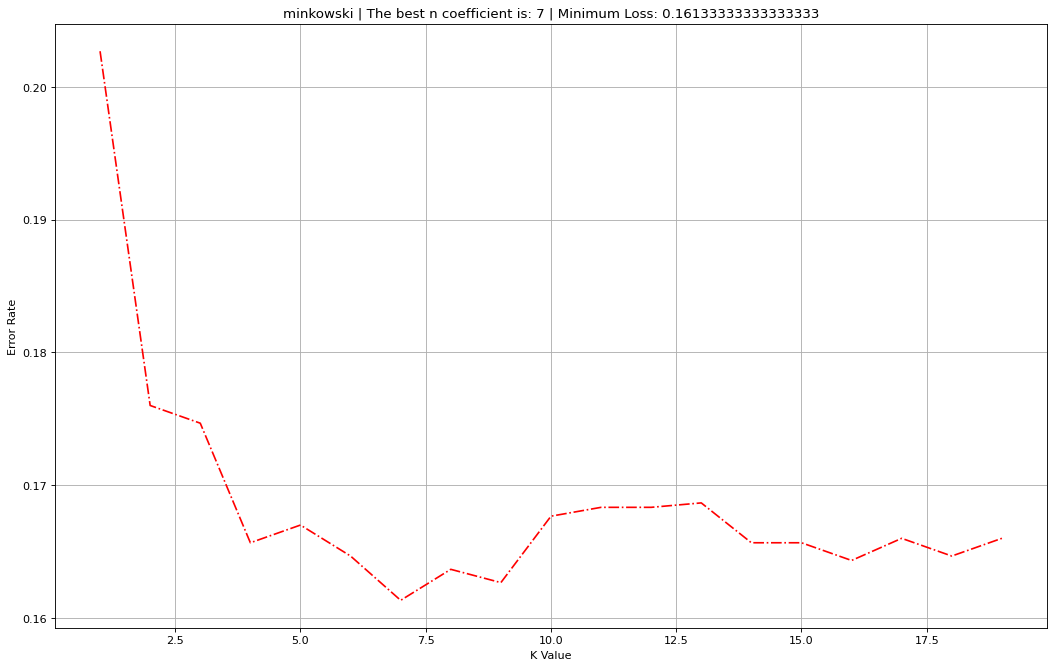

In [13]:
elbow('minkowski')

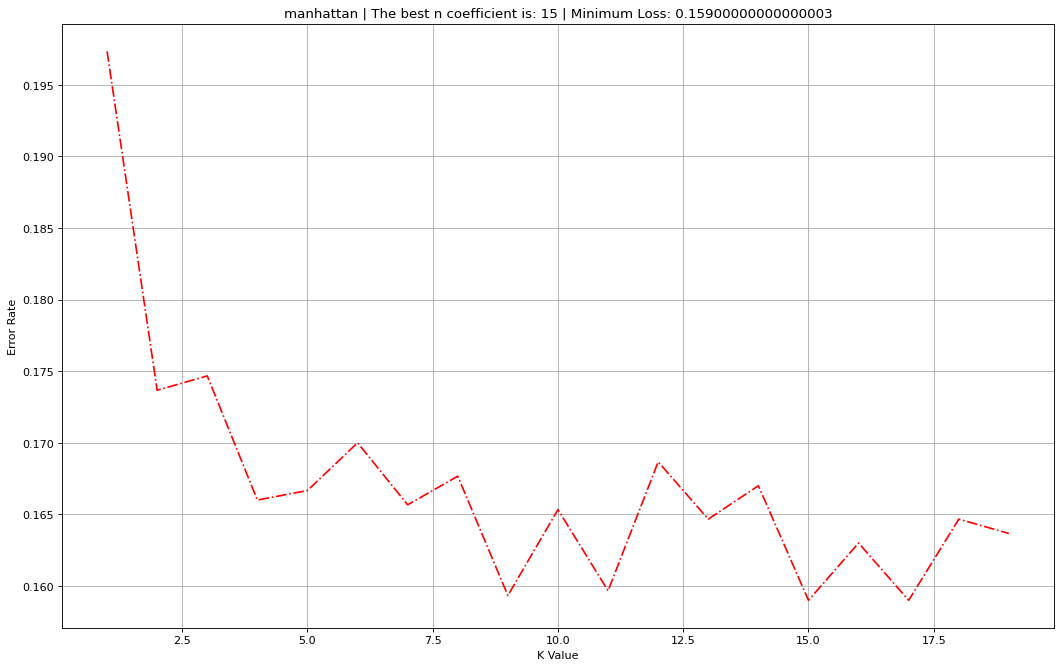

In [14]:
elbow('manhattan')

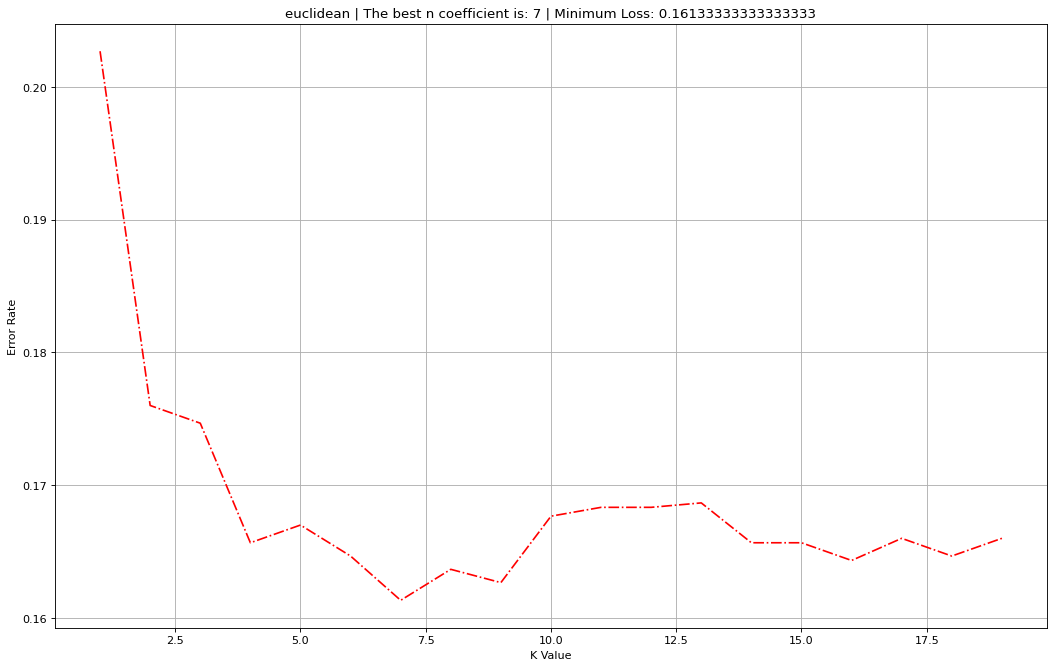

In [15]:
elbow('euclidean')

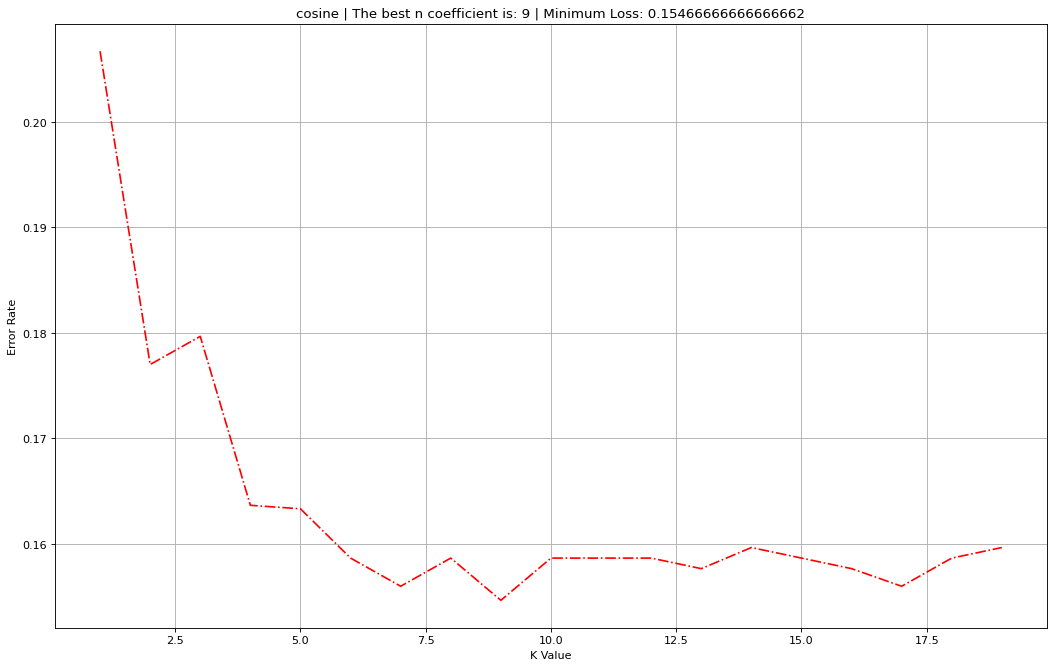

In [16]:
elbow('cosine')

#### 7.3 — GETTING THE MAXIMUM
As we said at 7.1, in order to find best results, we have to dig deep the dictionaries. So in this part, we are doing that.

In [17]:
knn_0_metric, knn_0_n, knn_0_value = [], [], []

for i,j in zip(metrics_knn,metrics_knn.values()):
    knn_0_metric.append(i)
    knn_0_n.append(j[0])
    knn_0_value.append(j[1])

knn_best_value = 100

for q in knn_0_value:
    for i in q:
        while True:
            if min(i) != 0:
                if knn_best_value > min(i):
                    knn_best_value = min(i)
                    break
                else:
                    break
            else:
                i.remove(min(i))

knn_best_metric, knn_best_n = knn_0_metric[knn_0_value.index(min(knn_0_value))], knn_0_n[knn_0_value.index(min(knn_0_value))]

#### 8.0 — M.L. APPLICATION
* Support Vector Machine Classifier
* KNN(K-Nearest Neighbors) Classifier
* Logistic Regression Classifier
* Gaussian Naive Bayes Classifier
* XGBoost Classifier

Also confusion matrix and a few important metrics have been printed down below.

In [18]:
# Model Selection
KNN = KNeighborsClassifier(n_neighbors=knn_best_n, metric=knn_best_metric, weights='distance')
SVCM = SVC(kernel="rbf")
LRC = LogisticRegression(random_state=17)
GNB = GaussianNB()
XGB = XGBClassifier(learning_rate=0.05)
def resume(model, title):

    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)

    ACC = round(accuracy_score(y_test, y_predicted)*100,3)
    CM = confusion_matrix(y_test, y_predicted)

    TP = CM[0][0]
    TN = CM[1][1]
    FP = CM[0][1]
    FN = CM[1][0]
    TP_RATE = round(TP/(TP + FN)*100,3)
    FP_RATE = round(FP/(FP + TN)*100,3)
    PRECISION = round(TP/(TP + FN)*100,3)
    RECALL = round(TP/(TP + FP)*100,3)
    F1 = round(2*((PRECISION*RECALL)/(PRECISION+RECALL)),3)

    print(f'Classification Report: {classification_report(y_test,y_predicted)}')
    plot_confusion_matrix(model, x_test, y_test)
    plt.title(f'{title}\nTrue Positive Rate: %{TP_RATE} | False Positive Rate: %{FP_RATE}\nAccuracy: %{ACC} | Precision: %{RECALL} | Recall: %{PRECISION} | F1 Score: %{F1}\nP: {y_predicted}\nT: {y_test}')
    plt.show()

Classification Report:               precision    recall  f1-score   support

           0       0.86      0.98      0.91      2387
           1       0.82      0.37      0.51       613

    accuracy                           0.85      3000
   macro avg       0.84      0.67      0.71      3000
weighted avg       0.85      0.85      0.83      3000



c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


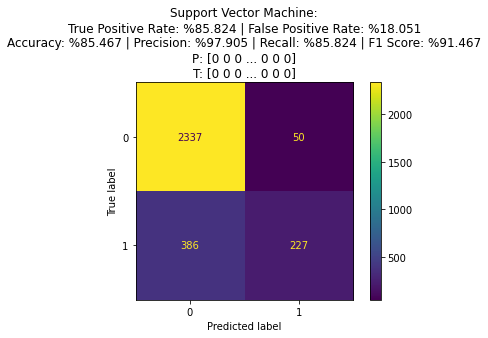

In [19]:
resume(SVCM, 'Support Vector Machine:')

Classification Report:               precision    recall  f1-score   support

           0       0.85      0.98      0.91      2387
           1       0.78      0.32      0.46       613

    accuracy                           0.84      3000
   macro avg       0.81      0.65      0.68      3000
weighted avg       0.83      0.84      0.82      3000



c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


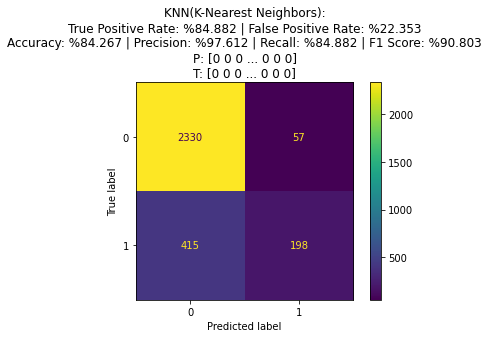

In [20]:
resume(KNN, 'KNN(K-Nearest Neighbors):')

Classification Report:               precision    recall  f1-score   support

           0       0.82      0.97      0.89      2387
           1       0.59      0.15      0.25       613

    accuracy                           0.81      3000
   macro avg       0.70      0.56      0.57      3000
weighted avg       0.77      0.81      0.76      3000



c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


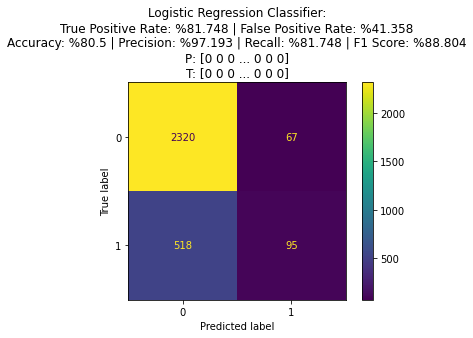

In [21]:
resume(LRC, 'Logistic Regression Classifier:')

Classification Report:               precision    recall  f1-score   support

           0       0.84      0.97      0.90      2387
           1       0.69      0.25      0.37       613

    accuracy                           0.82      3000
   macro avg       0.76      0.61      0.64      3000
weighted avg       0.81      0.82      0.79      3000



c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


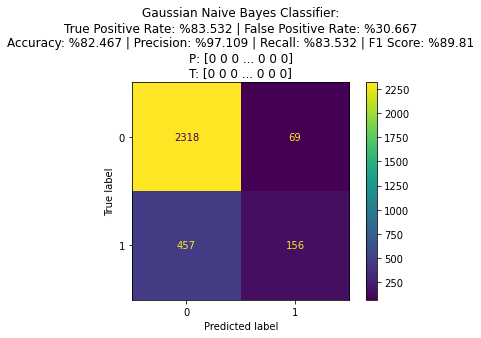

In [22]:
resume(GNB, 'Gaussian Naive Bayes Classifier:')

c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:26:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report:               precision    recall  f1-score   support

           0       0.87      0.97      0.92      2387
           1       0.78      0.44      0.56       613

    accuracy                           0.86      3000
   macro avg       0.82      0.70      0.74      3000
weighted avg       0.85      0.86      0.84      3000



c:\Users\lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


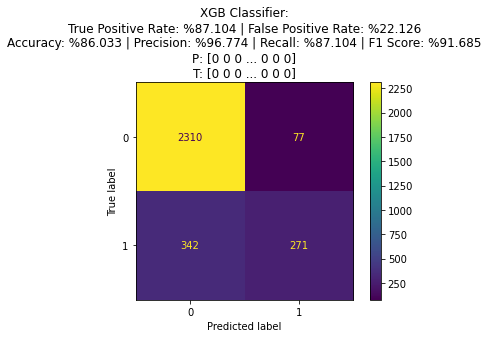

In [23]:
resume(XGB, 'XGB Classifier:')